# Synthetic Signal Analysis
This notebook will explore some options for performing analysis of synthetic signals produced by RAVEN during ARMA training.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Data

Provide the path to the original training signal header file

In [61]:
import os
print(os.getcwd())
training_path = os.path.join(os.getcwd(), '..', 'tests', 'integration_tests', 'ARMA', 'Sine')
training_signal_header = pd.read_csv(os.path.join(training_path, 'Data.csv'))
training_signal_header

/Users/talbpw/projects/HERON/notebooks


,scaling,Year,filename
0,1,10,Data_0.csv


Load in the sampled synthetic histories data

In [62]:
synthetic = pd.read_csv(os.path.join(training_path, 'synthetic.csv'))
synthetic

,RAVEN_sample_ID,Time,Year,scaling,Signal,prefix,PointProbability,ProbabilityWeight
0,0,0.0,10,1.0,-2.512013e-10,1,1.0,1.0
1,0,0.1,10,1.0,6.279052e-02,1,1.0,1.0
2,0,0.2,10,1.0,1.253332e-01,1,1.0,1.0
3,0,0.3,10,1.0,1.873813e-01,1,1.0,1.0
4,0,0.4,10,1.0,2.486899e-01,1,1.0,1.0
5,0,0.5,10,1.0,3.090170e-01,1,1.0,1.0
6,0,0.6,10,1.0,3.681246e-01,1,1.0,1.0
7,0,0.7,10,1.0,4.257793e-01,1,1.0,1.0
8,0,0.8,10,1.0,4.817537e-01,1,1.0,1.0
9,0,0.9,10,1.0,5.358268e-01,1,1.0,1.0


Next, pick a particular year to analyze

In [63]:
year = 10

Load the training data for that year

In [64]:
train_fname = training_signal_header.loc[training_signal_header['Year']==year]['filename'][0]
train_df = pd.read_csv(os.path.join(training_path, train_fname))
train_df

,Unnamed: 0,Time,Signal
0,0,0.0,0.000000
1,1,0.1,0.062791
2,2,0.2,0.125333
3,3,0.3,0.187381
4,4,0.4,0.248690
5,5,0.5,0.309017
6,6,0.6,0.368125
7,7,0.7,0.425779
8,8,0.8,0.481754
9,9,0.9,0.535827


Select the synthetic data for that year

In [65]:
synth_df = synthetic.loc[synthetic['Year']==year]
synth_df

,RAVEN_sample_ID,Time,Year,scaling,Signal,prefix,PointProbability,ProbabilityWeight
0,0,0.0,10,1.0,-2.512013e-10,1,1.0,1.0
1,0,0.1,10,1.0,6.279052e-02,1,1.0,1.0
2,0,0.2,10,1.0,1.253332e-01,1,1.0,1.0
3,0,0.3,10,1.0,1.873813e-01,1,1.0,1.0
4,0,0.4,10,1.0,2.486899e-01,1,1.0,1.0
5,0,0.5,10,1.0,3.090170e-01,1,1.0,1.0
6,0,0.6,10,1.0,3.681246e-01,1,1.0,1.0
7,0,0.7,10,1.0,4.257793e-01,1,1.0,1.0
8,0,0.8,10,1.0,4.817537e-01,1,1.0,1.0
9,0,0.9,10,1.0,5.358268e-01,1,1.0,1.0


## Value Duration Curves

Value duration curves (VDC) show the number of instances in a collection where the value is above a particular number. It provides similar information as a histogram or cumulative sum.

We start by defining the VDC function.

In [66]:
def vdc(signal, nbins=None):
    if nbins is None:
        nbins = int(np.sqrt(len(signal)))
    counts, edges = np.histogram(signal, nbins)
    counts = counts[::-1]
    edges = edges[::-1]
    cumulative = np.cumsum(counts)
    return cumulative, edges[1:]

def plot_vdc(edges, counts, label=None, ax=None):
    if ax is None:
      fig, ax = plt.subplots()
    ax.plot(edges, counts, '.-', label=label)
    ax.set_ylabel('Number of hours above value')
    ax.set_xlabel('Value')
    return ax

Get the VDC for the training signal

Text(0, 0.5, 'Number of hours above value')

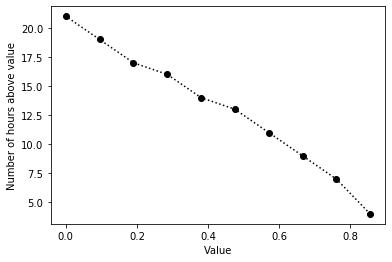

In [67]:
train_vdc = vdc(train_df['Signal'], nbins=10)
fig, ax = plt.subplots()
ax.plot(train_vdc[1], train_vdc[0], 'ko:', label='training')
ax.set_xlabel('Value')
ax.set_ylabel('Number of hours above value')


Next for each synthetic history:

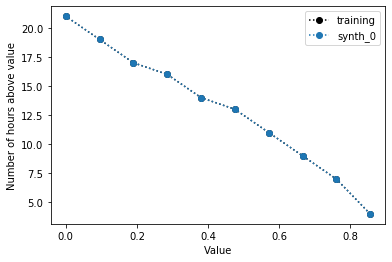

In [68]:
for s, sample in synth_df.groupby('RAVEN_sample_ID'):
    signal = vdc(sample['Signal'], nbins=10)
    ax.plot(signal[1], signal[0], 'o:', label=f'synth_{s}')
ax.legend()
fig